In [44]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [45]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [46]:
X_train = X_train / 255.0
X_test = X_test / 255.0
#For normalization purposes
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
#Reshaping for the CNN

In [47]:
def build_basic_cnn():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [48]:
def residual_block(x, filters):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

In [49]:
def build_resnet_like():
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = residual_block(x, 32)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = residual_block(x, 64)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    return model

In [50]:
def compile_and_train(model, name):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"\nTraining {name} model...")
    model.fit(X_train, y_train, epochs=5, validation_split=0.1, verbose=2)
    return model

In [51]:
def evaluate_and_plot(model, name):
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Test accuracy: {test_acc:.4f}")

    y_pred = np.argmax(model.predict(X_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)

    class_names = [
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name} Confusion Matrix (Heatmap)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [54]:
from sklearn.metrics import classification_report

def evaluate_metrics(model, name):
    print(f"\n{name} Evaluation Metrics:")

    y_pred = np.argmax(model.predict(X_test), axis=1)
    report = classification_report(y_test, y_pred, target_names=[
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ])
    print(report)

In [56]:
from sklearn.metrics import precision_recall_fscore_support

def get_metric_scores(model):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    return {
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }



Training Basic CNN model...
Epoch 1/5
1688/1688 - 5s - 3ms/step - accuracy: 0.8300 - loss: 0.4720 - val_accuracy: 0.8745 - val_loss: 0.3479
Epoch 2/5
1688/1688 - 4s - 3ms/step - accuracy: 0.8843 - loss: 0.3181 - val_accuracy: 0.8877 - val_loss: 0.3053
Epoch 3/5
1688/1688 - 4s - 3ms/step - accuracy: 0.9004 - loss: 0.2737 - val_accuracy: 0.9002 - val_loss: 0.2639
Epoch 4/5
1688/1688 - 4s - 3ms/step - accuracy: 0.9117 - loss: 0.2404 - val_accuracy: 0.8942 - val_loss: 0.2785
Epoch 5/5
1688/1688 - 4s - 3ms/step - accuracy: 0.9202 - loss: 0.2153 - val_accuracy: 0.8980 - val_loss: 0.2962
Basic CNN Test accuracy: 0.8908
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


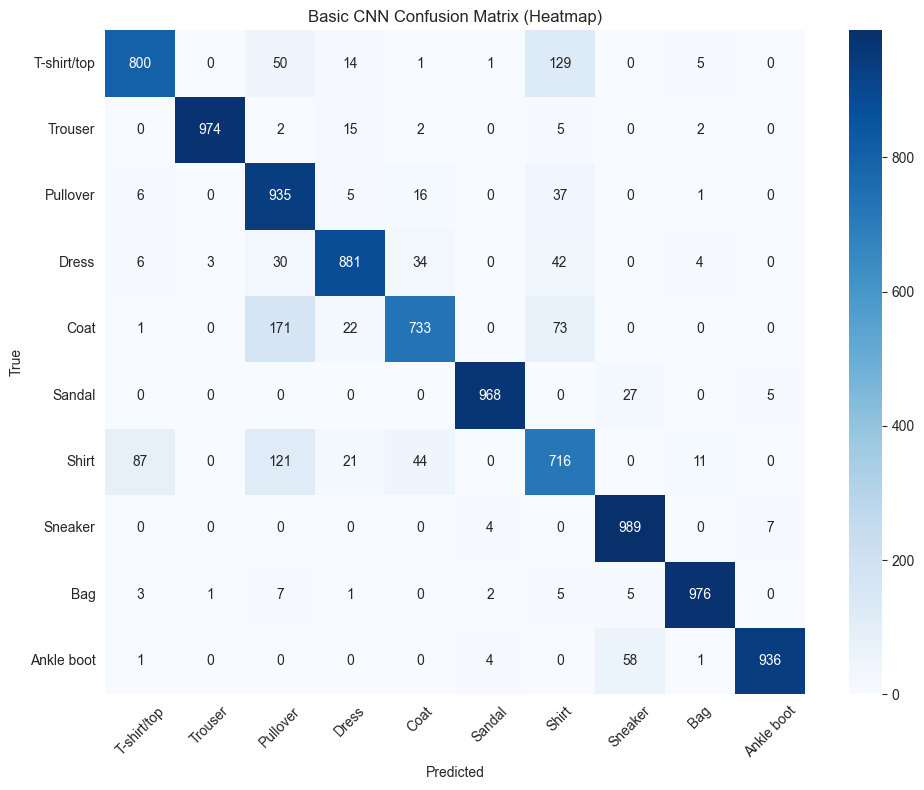

In [52]:
basic_cnn = build_basic_cnn()
basic_cnn = compile_and_train(basic_cnn, "Basic CNN")
evaluate_and_plot(basic_cnn, "Basic CNN")


Training ResNet-like CNN model...
Epoch 1/5
1688/1688 - 34s - 20ms/step - accuracy: 0.7839 - loss: 0.6081 - val_accuracy: 0.7943 - val_loss: 0.5446
Epoch 2/5
1688/1688 - 31s - 18ms/step - accuracy: 0.8695 - loss: 0.3657 - val_accuracy: 0.8373 - val_loss: 0.4822
Epoch 3/5
1688/1688 - 30s - 18ms/step - accuracy: 0.8921 - loss: 0.3090 - val_accuracy: 0.8212 - val_loss: 0.4703
Epoch 4/5
1688/1688 - 30s - 18ms/step - accuracy: 0.9036 - loss: 0.2766 - val_accuracy: 0.8952 - val_loss: 0.2742
Epoch 5/5
1688/1688 - 31s - 18ms/step - accuracy: 0.9120 - loss: 0.2527 - val_accuracy: 0.8685 - val_loss: 0.3332
ResNet-like CNN Test accuracy: 0.8682
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


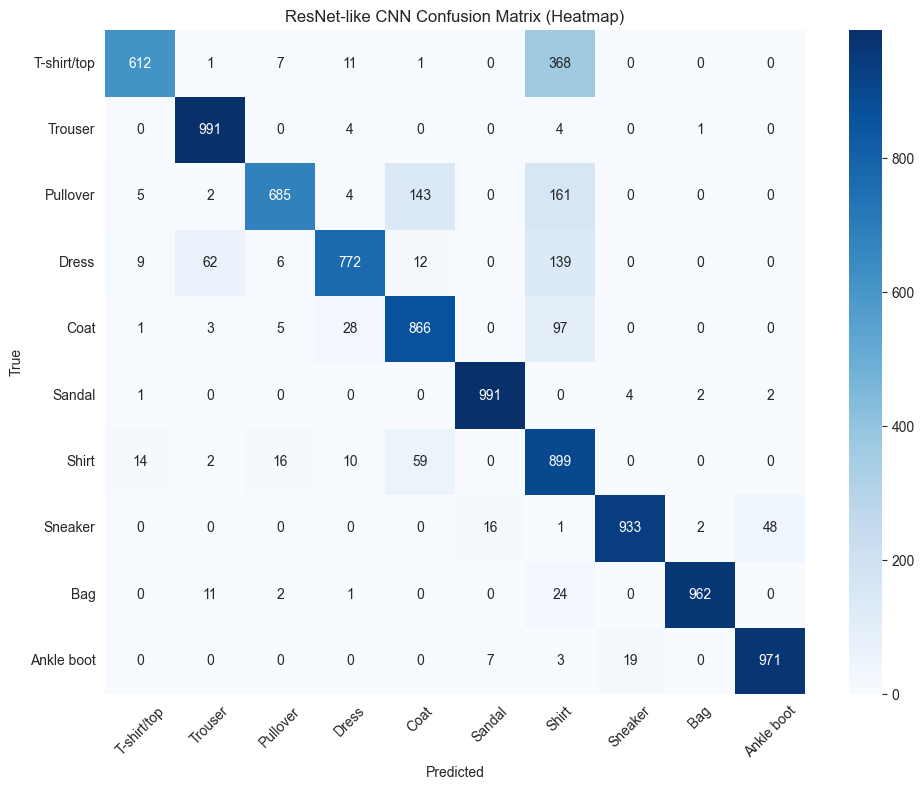

In [53]:
resnet_model = build_resnet_like()
resnet_model = compile_and_train(resnet_model, "ResNet-like CNN")
evaluate_and_plot(resnet_model, "ResNet-like CNN")


In [55]:
evaluate_metrics(basic_cnn, "Basic CNN")
evaluate_metrics(resnet_model, "ResNet-like CNN")


Basic CNN Evaluation Metrics:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.80      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.71      0.94      0.81      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.88      0.73      0.80      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.71      0.72      0.71      1000
     Sneaker       0.92      0.99      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000


ResNet-like CNN Evaluation Metrics:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.95      0.61 

In [57]:
basic_metrics = get_metric_scores(basic_cnn)
resnet_metrics = get_metric_scores(resnet_model)

print("\n📊 Model Comparison (Weighted Averages):")
for metric in ['precision', 'recall', 'f1_score']:
    print(f"{metric.capitalize()}:")
    print(f"  Basic CNN      = {basic_metrics[metric]:.4f}")
    print(f"  ResNet-like CNN = {resnet_metrics[metric]:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

📊 Model Comparison (Weighted Averages):
Precision:
  Basic CNN      = 0.8973
  ResNet-like CNN = 0.8988
Recall:
  Basic CNN      = 0.8908
  ResNet-like CNN = 0.8682
F1_score:
  Basic CNN      = 0.8913
  ResNet-like CNN = 0.8718


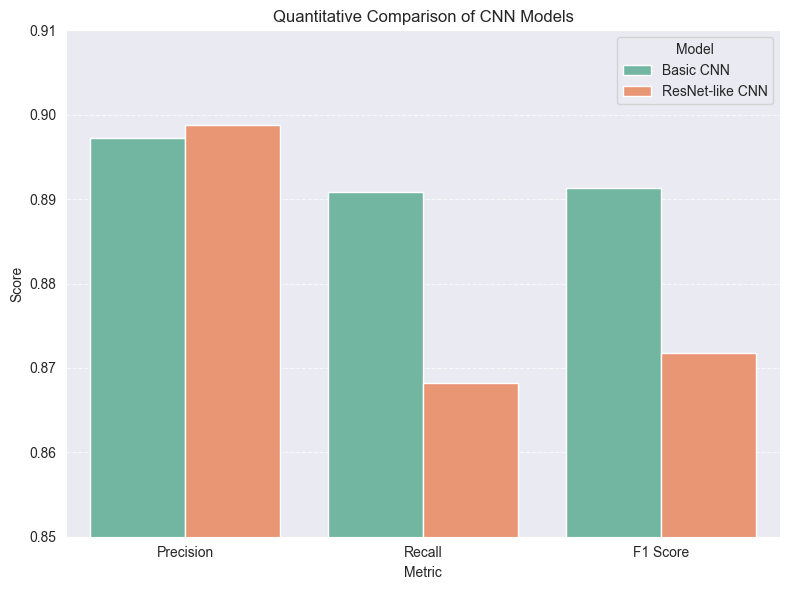

In [59]:
import pandas as pd

metrics_data = {
    "Metric": ["Precision", "Recall", "F1 Score"],
    "Basic CNN": [
        basic_metrics["precision"],
        basic_metrics["recall"],
        basic_metrics["f1_score"]
    ],
    "ResNet-like CNN": [
        resnet_metrics["precision"],
        resnet_metrics["recall"],
        resnet_metrics["f1_score"]
    ]
}

df = pd.DataFrame(metrics_data)


plt.figure(figsize=(8, 6))
df_melted = df.melt(id_vars="Metric", var_name="Model", value_name="Score")
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", palette="Set2")

plt.title("Quantitative Comparison of CNN Models")
plt.ylim(0.85, 0.91)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title="Model")
plt.show()

In [61]:
basic_cnn.save("basic_cnn_model.keras")
resnet_model.save("resnet_like_model.keras")

This is the loading without retraining part

C:\Users\satya\.conda\envs\PythonPractice\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\satya\.conda\envs\PythonPractice\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 30 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Basic CNN (Loaded) Test accuracy: 0.8908
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


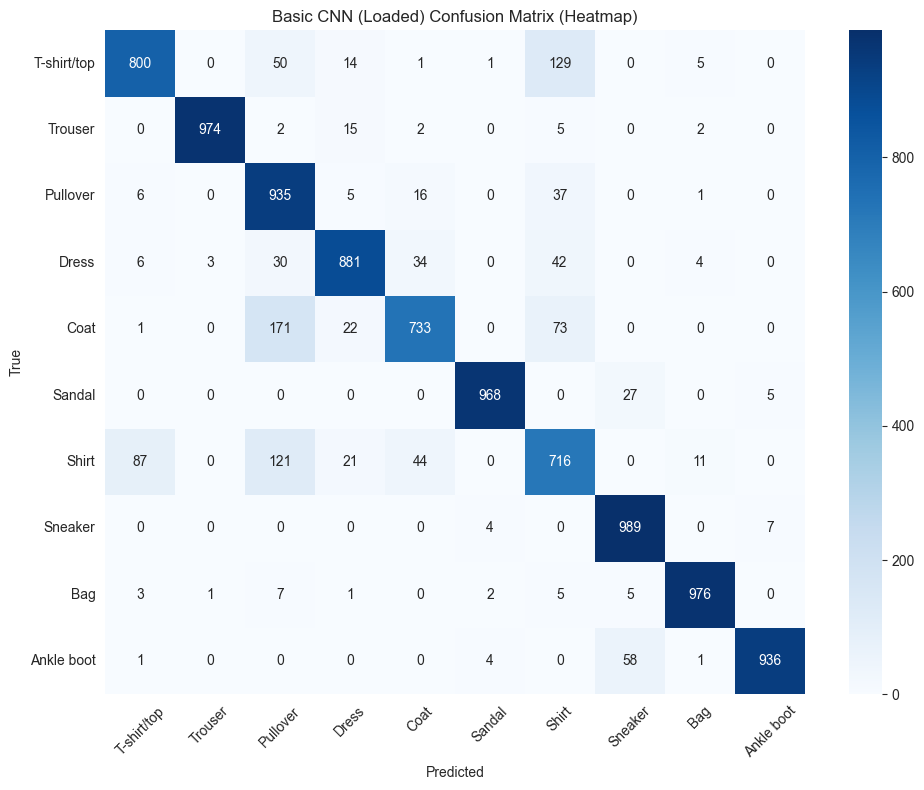

ResNet-like CNN (Loaded) Test accuracy: 0.8682
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


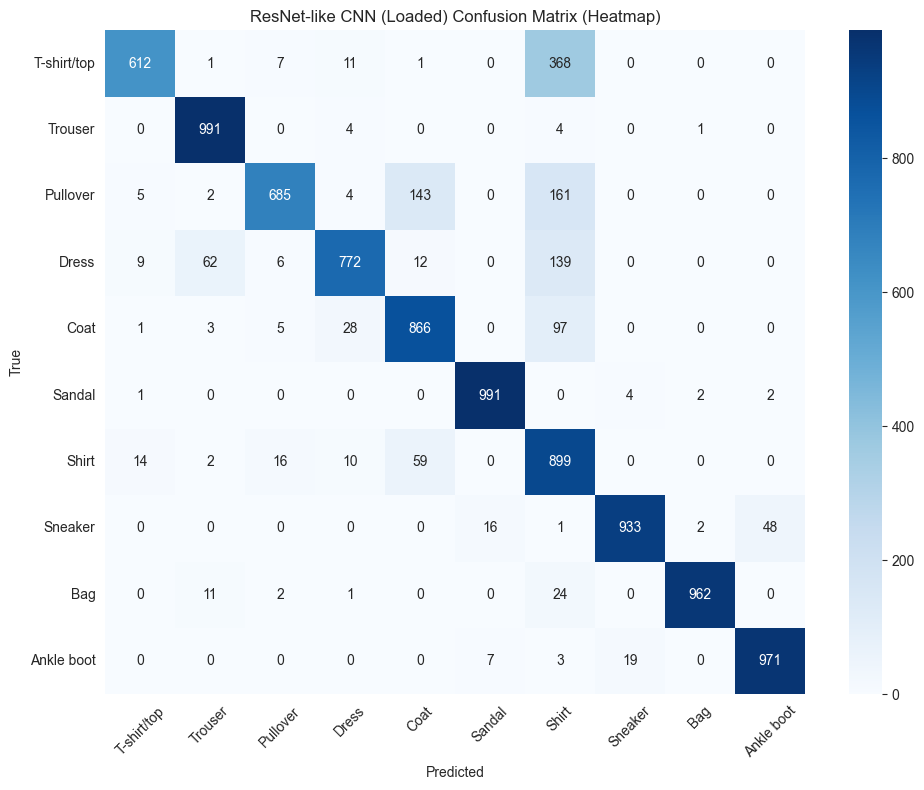

In [62]:
from tensorflow.keras.models import load_model

loaded_basic = load_model("basic_cnn_model.keras")
loaded_resnet = load_model("resnet_like_model.keras")


evaluate_and_plot(loaded_basic, "Basic CNN (Loaded)")
evaluate_and_plot(loaded_resnet, "ResNet-like CNN (Loaded)")